In [140]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##DATA: direct load from the statsmodels library
http://statsmodels.sourceforge.net/devel/datasets/generated/macrodata.html

#I am interested in you understanding the concepts of stationarity:
##a time series is stationary if its MEAN and VARIANCE are constant globally 
##i.e. there can be local variations, but the mean over a reasonably large portion of the time series (several datapoints) will not change at large distances in the time series

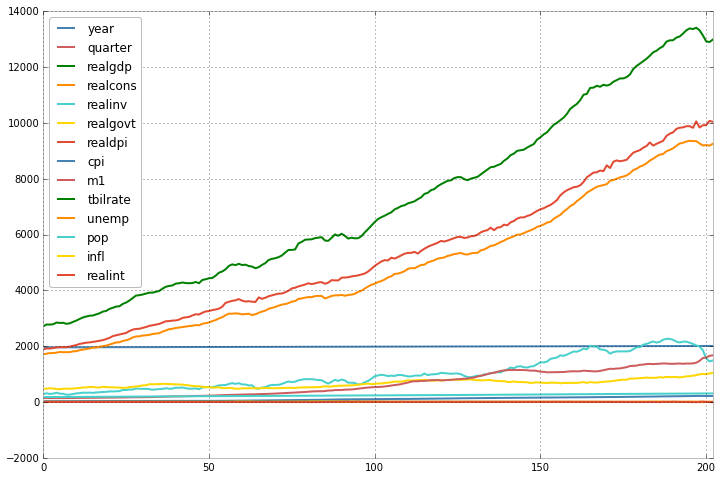

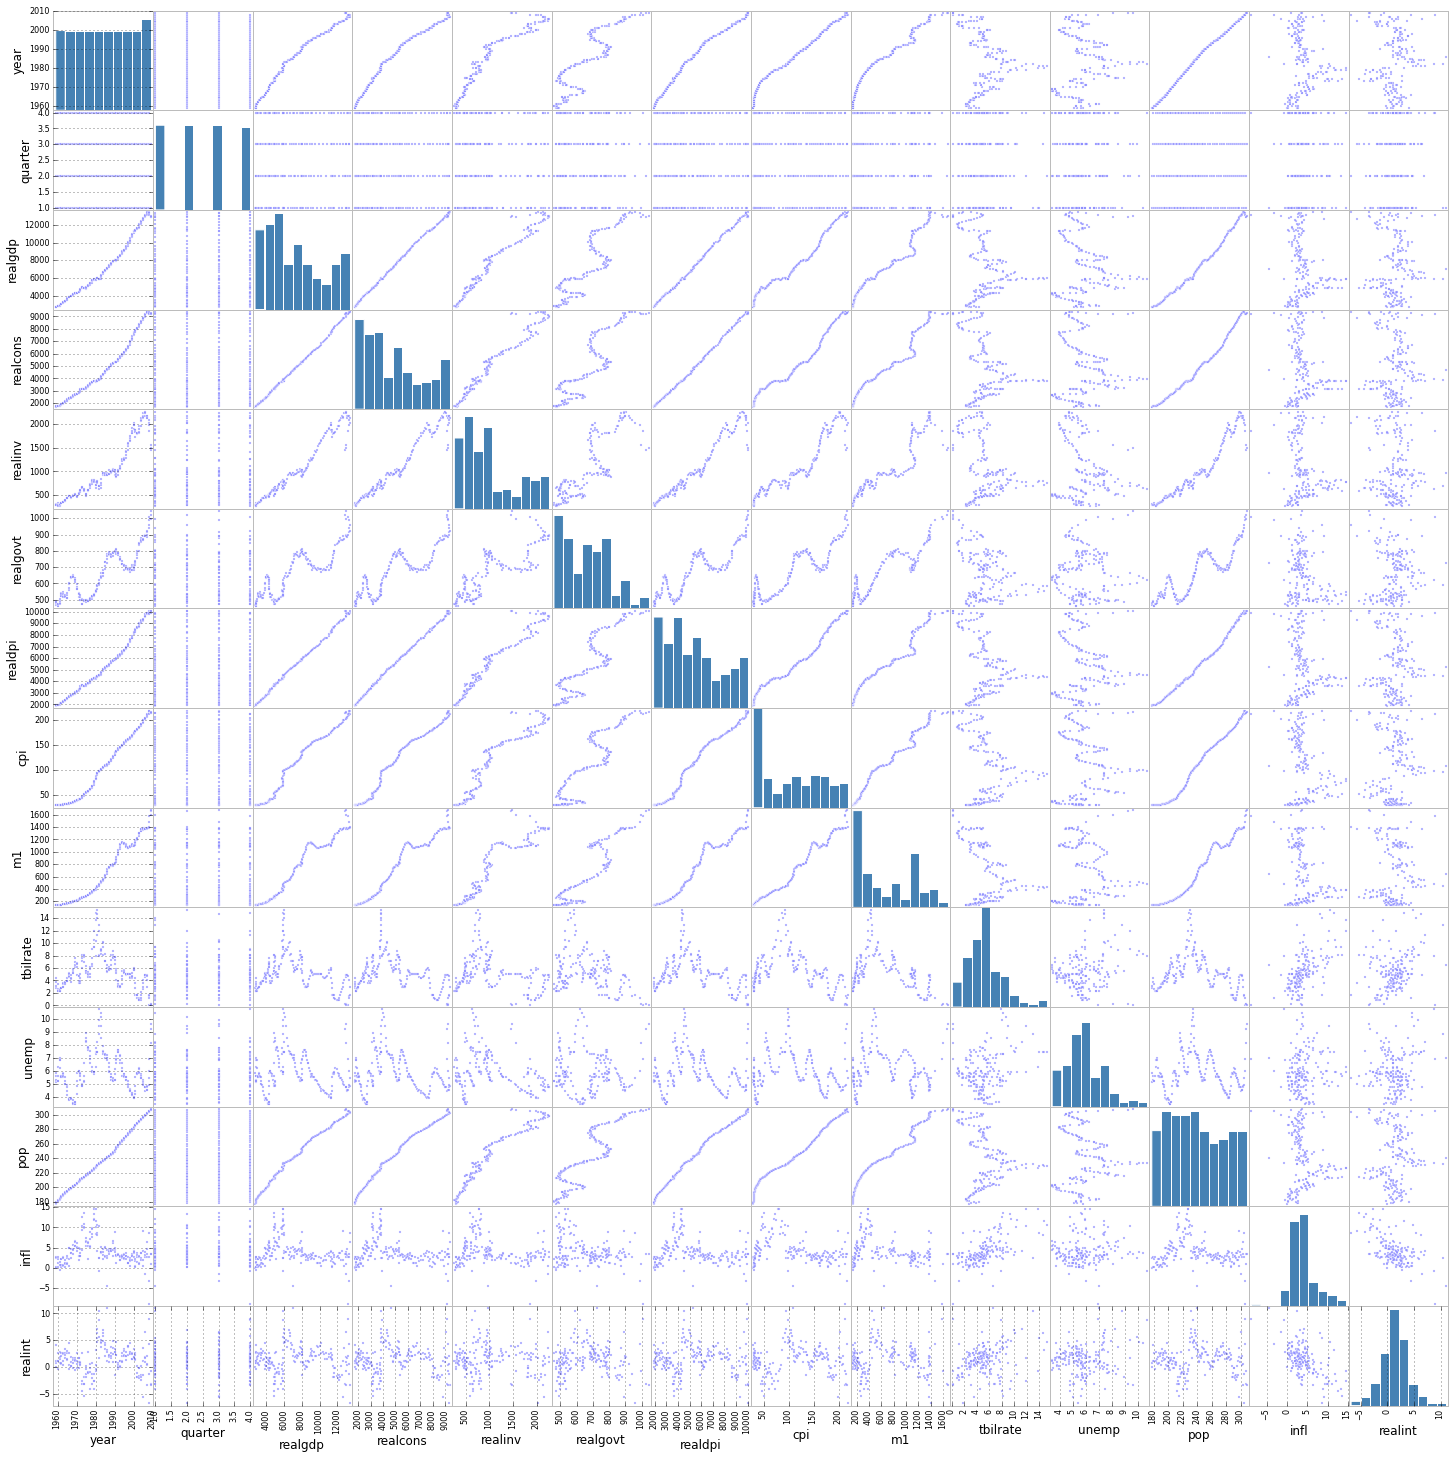

In [141]:
data = sm.datasets.macrodata.load_pandas().data


data.plot(figsize=(12,8));

from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(25,25));

Real Gross Domestic Product (real GDP) is a macroeconomic measure of the value of economic output adjusted for price changes (i.e., inflation or deflation). This adjustment transforms the money-value measure, nominal GDP, into an index for quantity of total output.

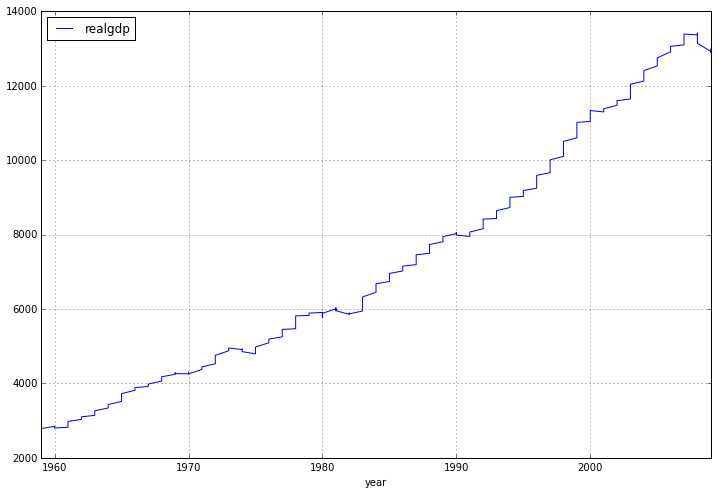

In [100]:
ax = data.plot('year','realgdp', figsize=(12,8));


#use a ROLLING MEAN to visually assess stationarity

9     2806.4838
10    2827.2908
11    2847.1937
12    2872.7690
13    2900.7195
dtype: float64 198    13211.2024
199    13229.1482
200    13225.0976
201    13209.1801
202    13198.2241
dtype: float64


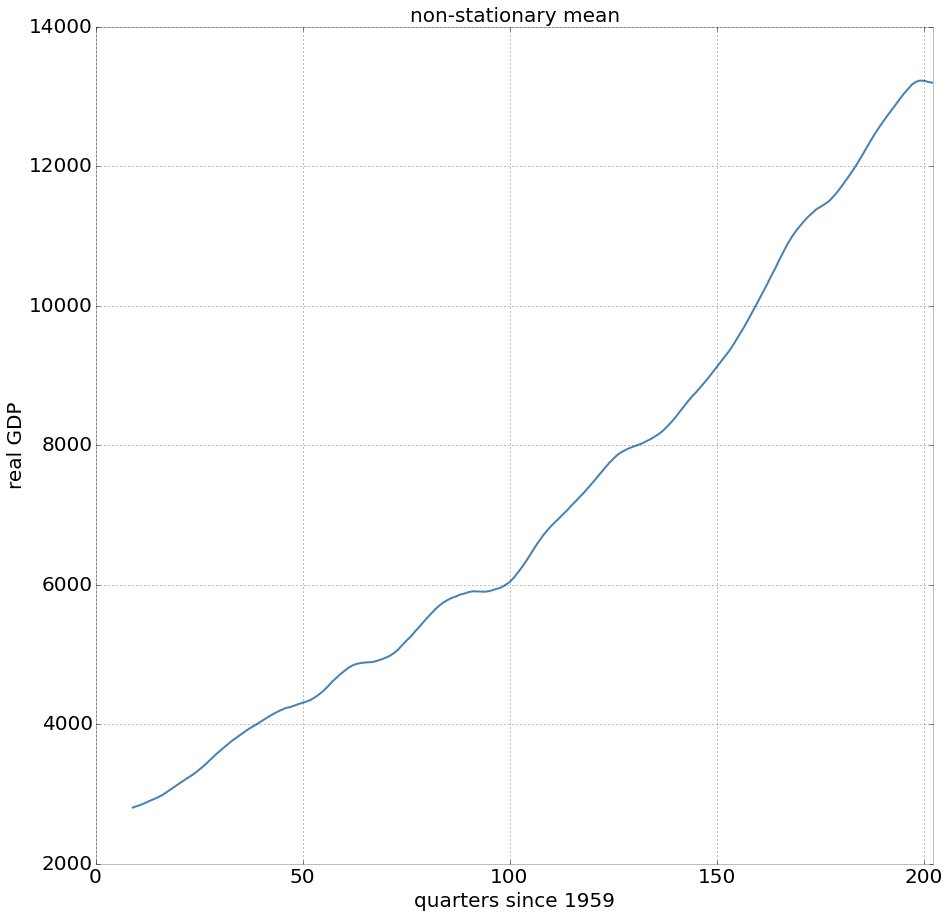

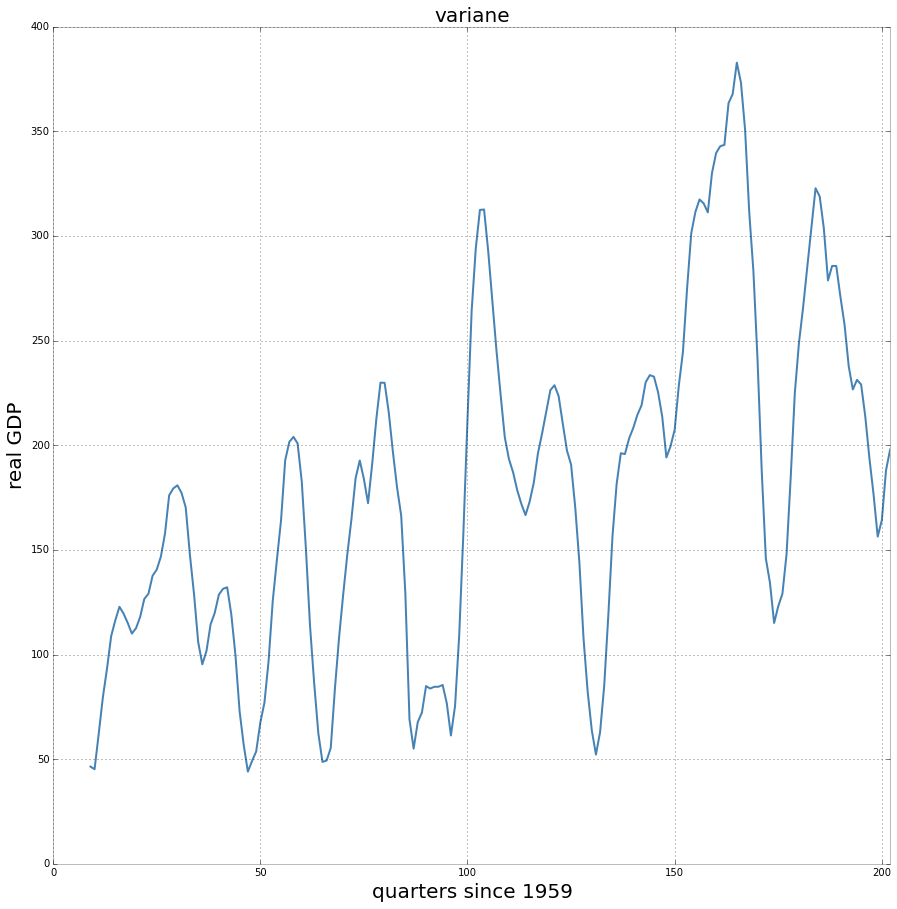

In [146]:
ax = pd.rolling_mean(data['realgdp'], 10).plot(figsize=(15,15), fontsize=20)
ax.set_title("non-stationary mean", fontsize=20)
pl.xlabel("quarters since 1959", fontsize=20)
pl.ylabel("real GDP", fontsize=20)
pl.figure()
ax = pd.rolling_std(data['realgdp'], 10).plot(figsize=(15,15))
ax.set_title("variane", fontsize=20)
pl.xlabel("quarters since 1959", fontsize=20)
pl.ylabel("real GDP", fontsize=20)

print (pd.rolling_mean(data['realgdp'], 10).dropna().head(), pd.rolling_mean(data['realgdp'], 10).dropna().tail())

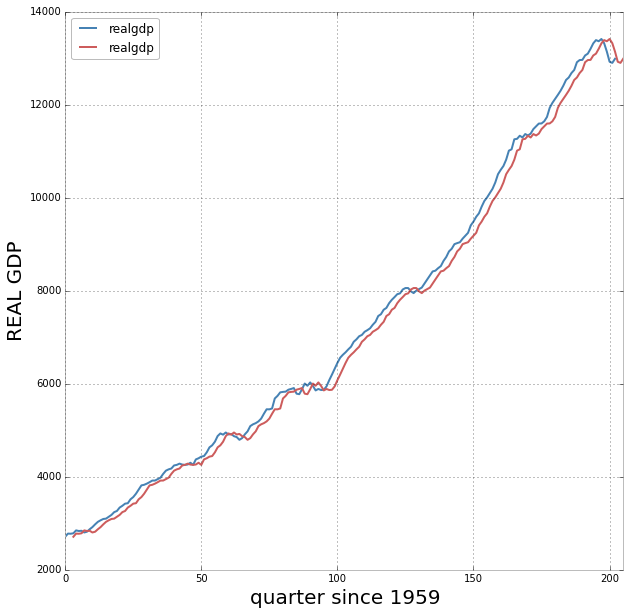

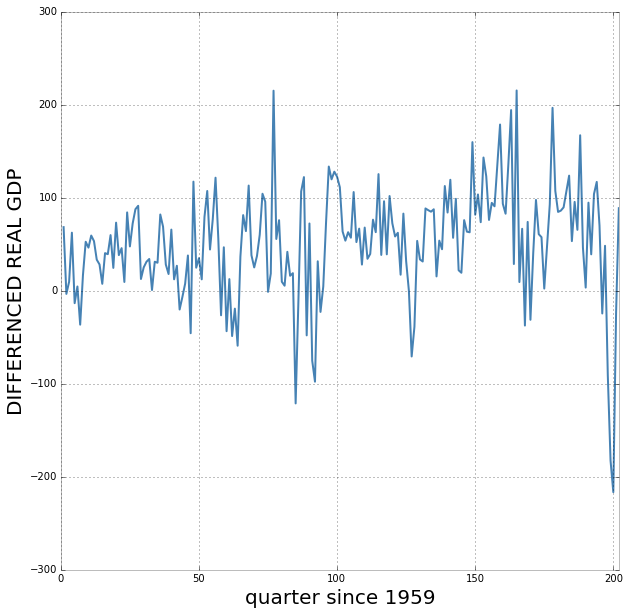

In [156]:

ax1 = data[['realgdp']].plot(figsize=(10,10))
ax1 = data[['realgdp']].plot(x=np.arange(len(data))+3, ax=ax1)
ax1.set_xlabel('quarter since 1959', fontsize=20)
ax1.set_ylabel('REAL GDP', fontsize=20)
 
pl.figure()
ax2 = data.realgdp.diff(periods=1).plot(figsize=(10,10))
ax2.set_xlabel('quarter since 1959', fontsize=20)
ax2.set_ylabel('DIFFERENCED REAL GDP', fontsize=20)


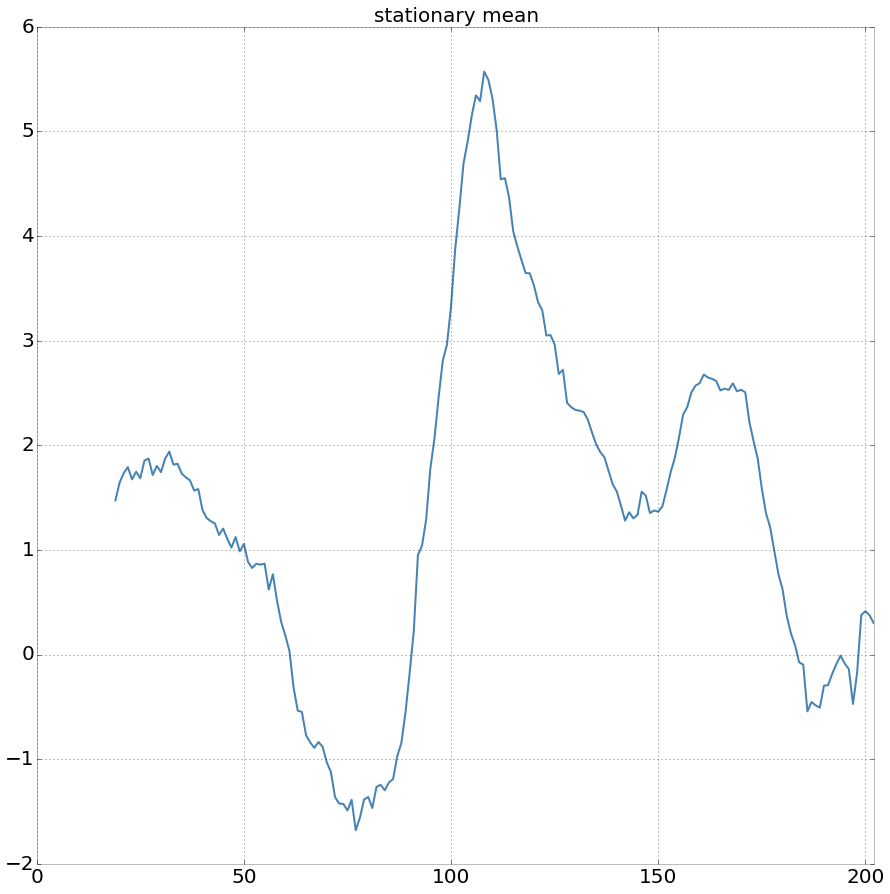

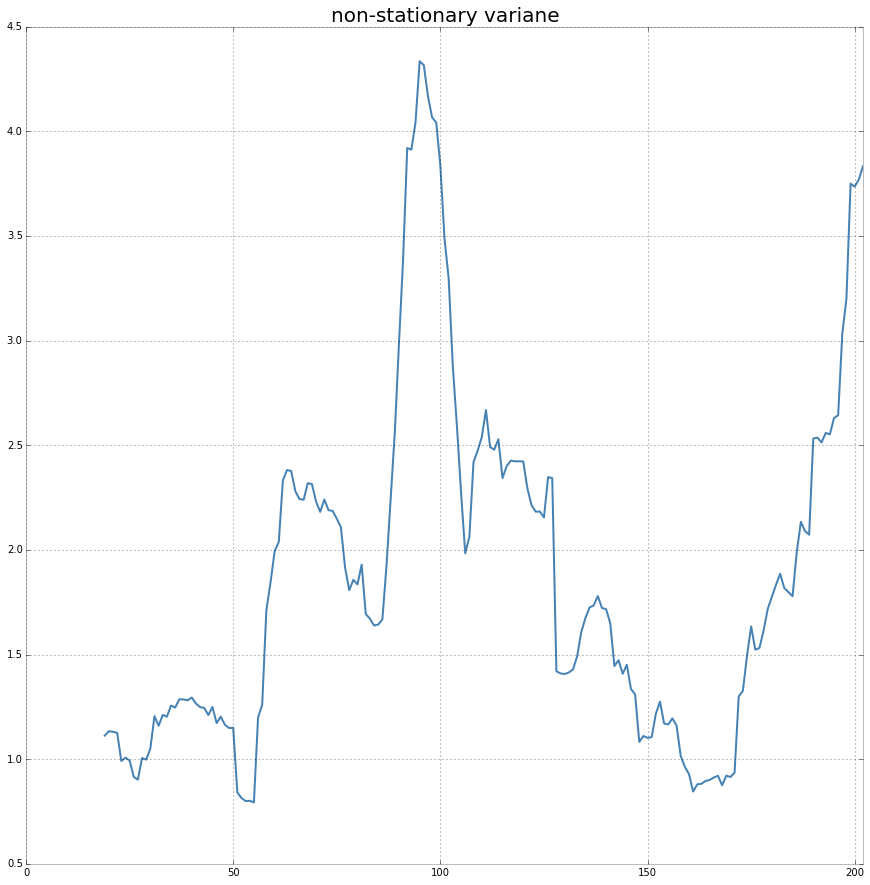

In [157]:
ax = pd.rolling_mean(data['realint'], 20).plot(figsize=(15,15), fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(data['realint'], 20).plot(figsize=(15,15))
ax.set_title("non-stationary variane", fontsize=20)

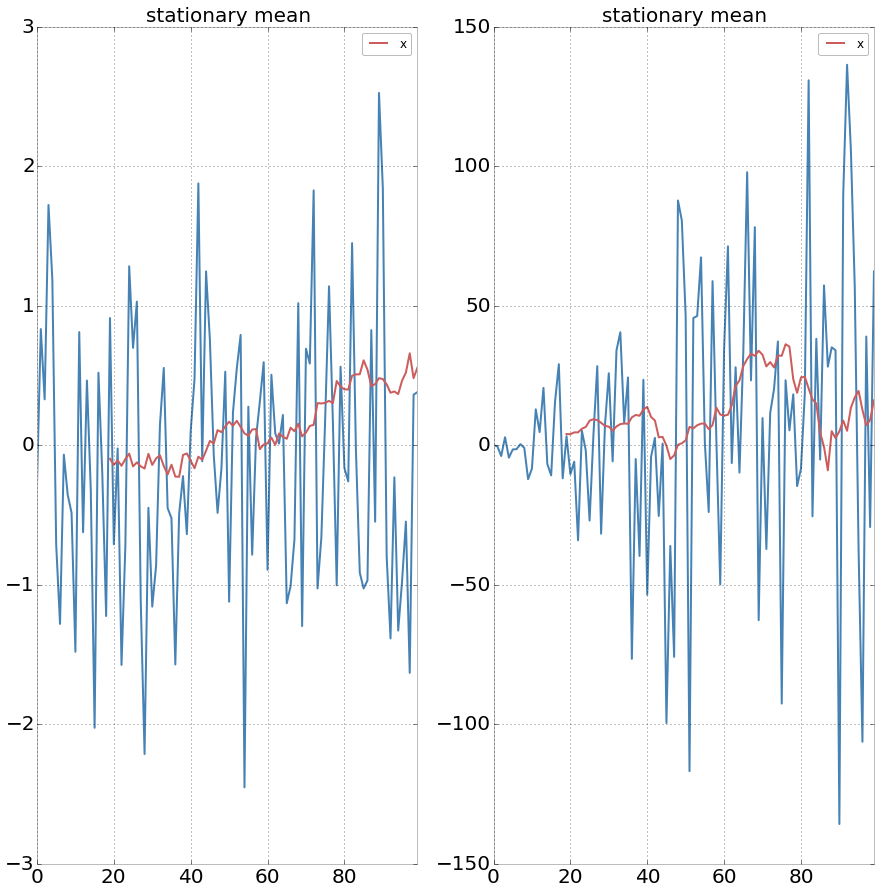

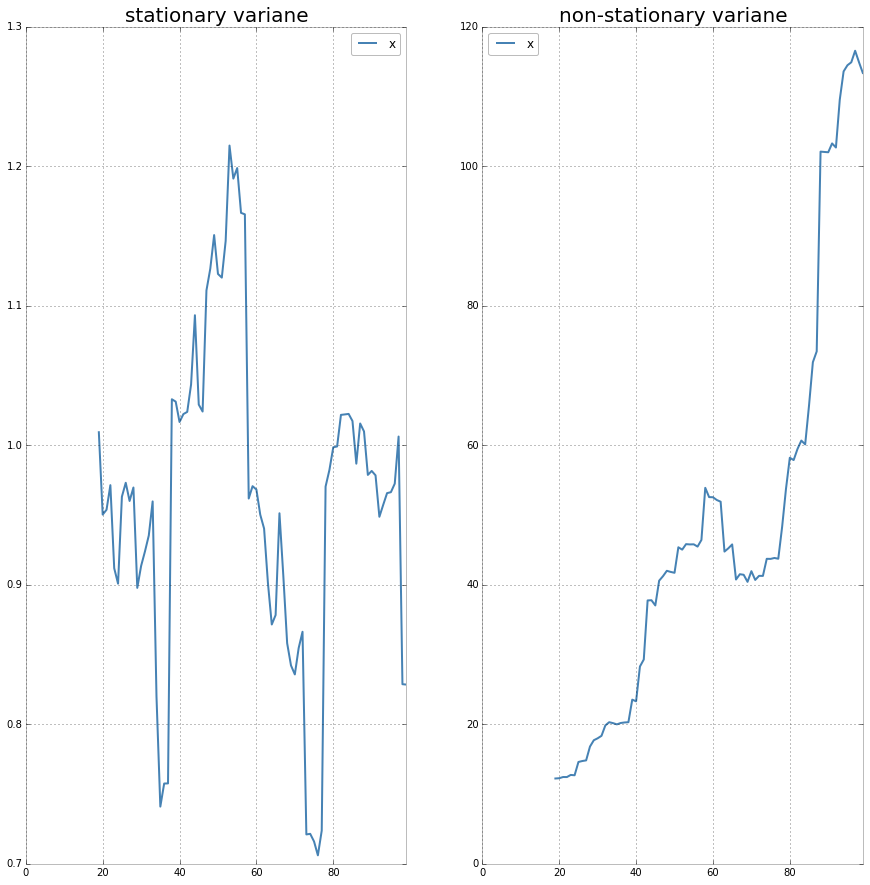

In [178]:
fig = pl.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x1 = np.random.randn(100)
x2 = np.random.randn(100)*np.arange(0.,100,1.0)
ax1.plot(np.random.randn(100))
ax2.plot(np.random.randn(100)*np.arange(100))
ax1 = pd.rolling_mean(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), fontsize=20, ax=ax1)
ax2 = pd.rolling_mean(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), fontsize=20, ax=ax2)

ax1.set_title("stationary mean", fontsize=20)
ax2.set_title("stationary mean", fontsize=20)
fig = pl.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1 = pd.rolling_std(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), ax=ax1)
ax2 = pd.rolling_std(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), ax=ax2)
ax1.set_title("stationary variane", fontsize=20)
ax2.set_title("non-stationary variane", fontsize=20)

There are formal tests to see if these time series are stationary e.g.: ADFuller test
[https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test]
Null hypothsis: there is a "unit root": i.e. the series is not stationary [http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html]

In [195]:
print ("realgdp {0:.2f}".format(sm.tsa.adfuller(data['realgdp'])[1]), 
       sm.tsa.adfuller(data['realgdp']))

print ("realint {0:.2f}".format(sm.tsa.adfuller(data['realint'])[1]), 
       sm.tsa.adfuller(data['realint']))

print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(np.random.randn(100))[1]),
       sm.tsa.adfuller(np.random.randn(100)) )


realgdp 1.00 (1.7504627967647071, 0.99824553723350318, 12, 190, {'5%': -2.8768752281673717, '1%': -3.4652439354133255, '10%': -2.5749446537396121}, 2034.5171236683821)
realint 0.01 (-3.5337325911860349, 0.0071618724946517177, 2, 200, {'5%': -2.876102355, '1%': -3.4634760791249999, '10%': -2.574532225}, 827.24666293305995)
synthetic stationary data 0.00 (-9.8852209854744046, 3.6793254132654259e-17, 0, 99, {'5%': -2.8912082118604681, '1%': -3.4981980821890981, '10%': -2.5825959973472097}, 260.70313054582687)


In [36]:
print (sm.datasets.cancer.NOTE)

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [196]:
cdata = sm.datasets.cancer.load_pandas().data

In [197]:
cdata.describe()

,cancer,population
count,301.000000,301.000000
mean,39.857143,11288.056478
std,50.977801,13780.010088
min,0.000000,445.000000
25%,11.000000,2935.000000
50%,22.000000,6445.000000
75%,48.000000,13989.000000
max,360.000000,88456.000000


In [198]:
cdata.head()

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224edd90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1135978d0>]], dtype=object)

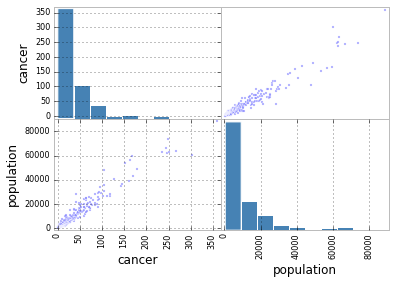

In [199]:
scatter_matrix(cdata)

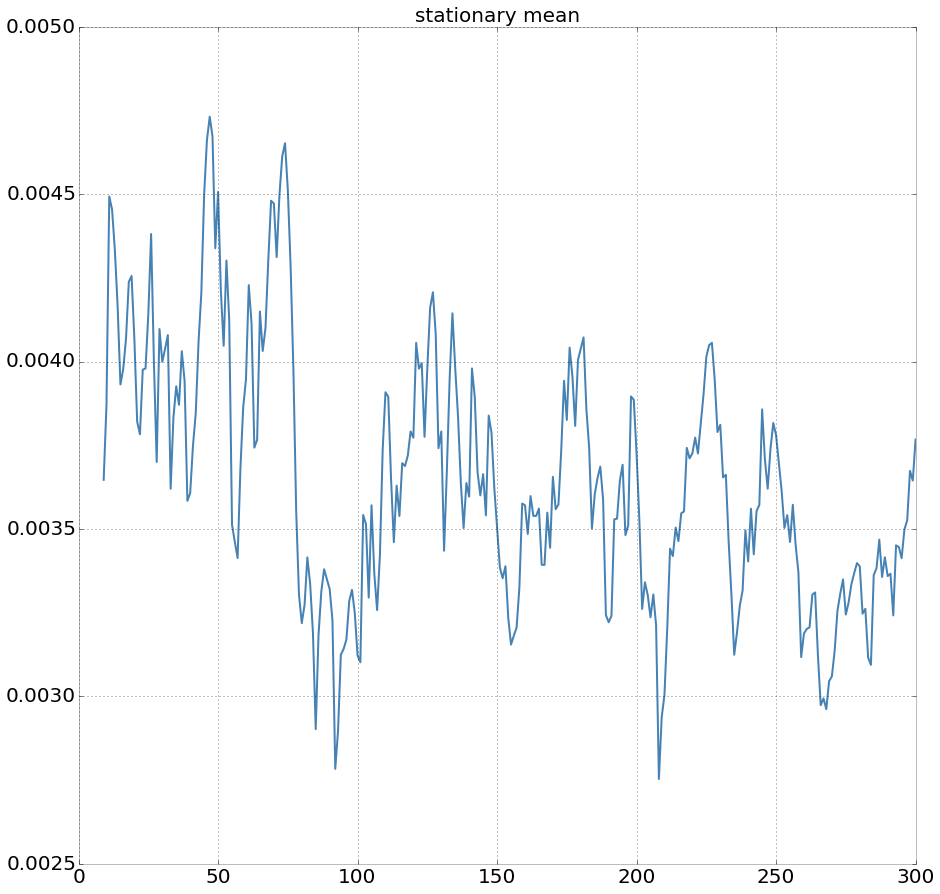

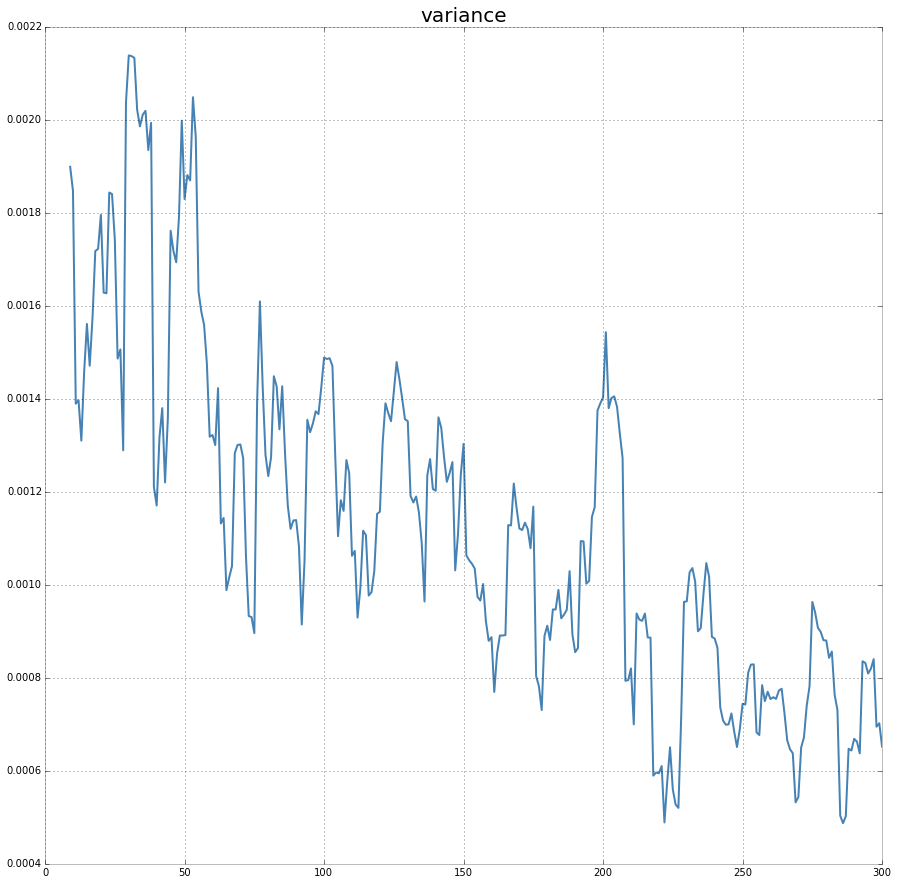

In [204]:
ax = pd.rolling_mean(cdata['cancer']/cdata['population'], 10).plot(figsize=(15,15), 
                                                                   fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(cdata['cancer']/cdata['population'], 10).plot(figsize=(15,15))
ax.set_title("variance", fontsize=20)

In [203]:
sm.tsa.adfuller (cdata['cancer']/cdata['population'])

(-3.2124663237520794,
 0.019274324926639035,
 16,
 284,
 {'1%': -3.4535872903895797,
  '10%': -2.5722217283277127,
  '5%': -2.8717713552112119},
 -3030.2409529605561)